In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from datetime import date
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import linregress
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = r"C:\Users\drraa\OneDrive\Desktop\CVIP internship\Internship\phase 2 normal\hourly_data.csv"
data = pd.read_csv(file_path)


In [4]:
data.head(5)

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,WindEquipmentChangeDate
0,72518014735,2015-01-01T00:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,22,0,46,30.05,29.72,10.0,18,150,10,9/8/2006
1,72518014735,2015-01-01T01:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,22,0,48,30.04,29.71,10.0,18,170,8,9/8/2006
2,72518014735,2015-01-01T02:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,20,0,52,30.03,29.7,10.0,16,180,6,9/8/2006
3,72518014735,2015-01-01T03:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,19,0,57,30.03,29.7,10.0,16,190,7,9/8/2006
4,72518014735,2015-01-01T04:51:00,FM-15,7,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",...,21,0,52,30.04,29.71,10.0,17,170,8,9/8/2006


In [5]:
data.isnull().sum()

STATION                      0
DATE                         0
REPORT_TYPE                  0
SOURCE                       0
BackupElements               0
BackupElevation              0
BackupEquipment              0
BackupLatitude               0
BackupLongitude              0
BackupName                   0
HourlyAltimeterSetting       0
HourlyDewPointTemperature    0
HourlyDryBulbTemperature     0
HourlyPrecipitation          0
HourlyRelativeHumidity       0
HourlySeaLevelPressure       0
HourlyStationPressure        0
HourlyVisibility             0
HourlyWetBulbTemperature     0
HourlyWindDirection          0
HourlyWindSpeed              0
WindEquipmentChangeDate      0
dtype: int64

In [6]:
data.columns

Index(['STATION', 'DATE', 'REPORT_TYPE', 'SOURCE', 'BackupElements',
       'BackupElevation', 'BackupEquipment', 'BackupLatitude',
       'BackupLongitude', 'BackupName', 'HourlyAltimeterSetting',
       'HourlyDewPointTemperature', 'HourlyDryBulbTemperature',
       'HourlyPrecipitation', 'HourlyRelativeHumidity',
       'HourlySeaLevelPressure', 'HourlyStationPressure', 'HourlyVisibility',
       'HourlyWetBulbTemperature', 'HourlyWindDirection', 'HourlyWindSpeed',
       'WindEquipmentChangeDate'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64729 entries, 0 to 64728
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   STATION                    64729 non-null  int64  
 1   DATE                       64729 non-null  object 
 2   REPORT_TYPE                64729 non-null  object 
 3   SOURCE                     64729 non-null  int64  
 4   BackupElements             64729 non-null  object 
 5   BackupElevation            64729 non-null  int64  
 6   BackupEquipment            64729 non-null  object 
 7   BackupLatitude             64729 non-null  float64
 8   BackupLongitude            64729 non-null  float64
 9   BackupName                 64729 non-null  object 
 10  HourlyAltimeterSetting     64729 non-null  object 
 11  HourlyDewPointTemperature  64729 non-null  object 
 12  HourlyDryBulbTemperature   64729 non-null  object 
 13  HourlyPrecipitation        64729 non-null  obj

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
STATION,64729.0,7.251801e+10,0.000000,7.251801e+10,7.251801e+10,7.251801e+10,7.251801e+10,7.251801e+10
SOURCE,64729.0,6.994207e+00,0.075894,6.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
BackupElevation,64729.0,2.600000e+02,0.000000,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02
BackupLatitude,64729.0,4.268978e+01,0.004167,4.268120e+01,4.269180e+01,4.269180e+01,4.269180e+01,4.269180e+01
BackupLongitude,64729.0,-7.382830e+01,0.005736,-7.383109e+01,-7.383109e+01,-7.383109e+01,-7.383109e+01,-7.381650e+01
HourlyRelativeHumidity,64729.0,6.636154e+01,18.376979,8.000000e+00,5.300000e+01,6.700000e+01,8.100000e+01,1.000000e+02
HourlyVisibility,64729.0,9.315017e+00,2.128327,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,9.942000e+01
HourlyWetBulbTemperature,64729.0,4.432488e+01,17.801866,-1.400000e+01,3.100000e+01,4.500000e+01,6.000000e+01,8.100000e+01
HourlyWindSpeed,64729.0,7.556103e+00,5.735342,0.000000e+00,3.000000e+00,7.000000e+00,1.100000e+01,4.300000e+01


In [9]:
data.nunique()

STATION                          1
DATE                         64729
REPORT_TYPE                      1
SOURCE                           2
BackupElements                   1
BackupElevation                  1
BackupEquipment                  1
BackupLatitude                   2
BackupLongitude                  2
BackupName                       1
HourlyAltimeterSetting         203
HourlyDewPointTemperature      202
HourlyDryBulbTemperature       214
HourlyPrecipitation            109
HourlyRelativeHumidity          90
HourlySeaLevelPressure         209
HourlyStationPressure          192
HourlyVisibility                20
HourlyWetBulbTemperature        96
HourlyWindDirection             38
HourlyWindSpeed                 34
WindEquipmentChangeDate          1
dtype: int64

In [10]:
data[data.duplicated()]

,STATION,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,...,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,WindEquipmentChangeDate


In [11]:
# Convert DATE column to datetime format

data['DATE'] = pd.to_datetime(data['DATE'])

In [12]:
# Handle missing values
# Fill missing numeric values with the mean of the column


num_cols = data.select_dtypes(include=[np.number]).columns
data[num_cols] = data[num_cols].transform(lambda x: x.fillna(x.mean()))


In [13]:
# Fill missing categorical values with the mode of the column


cat_columns = data.select_dtypes(include=[object]).columns
for column in cat_columns:
    mode_value = data[column].mode().iloc[0]
    data[column].fillna(mode_value, inplace=True)


In [14]:

# Convert 'WindEquipmentChangeDate' to datetime, setting errors to 'coerce' which turns invalid parsing into NaT

data['WindEquipmentChangeDate'] = pd.to_datetime(data['WindEquipmentChangeDate'], errors='coerce')

# Fill NaT (missing values after conversion) with the placeholder date '1900-01-01'

data['WindEquipmentChangeDate'].fillna(pd.Timestamp('1900-01-01'), inplace=True)


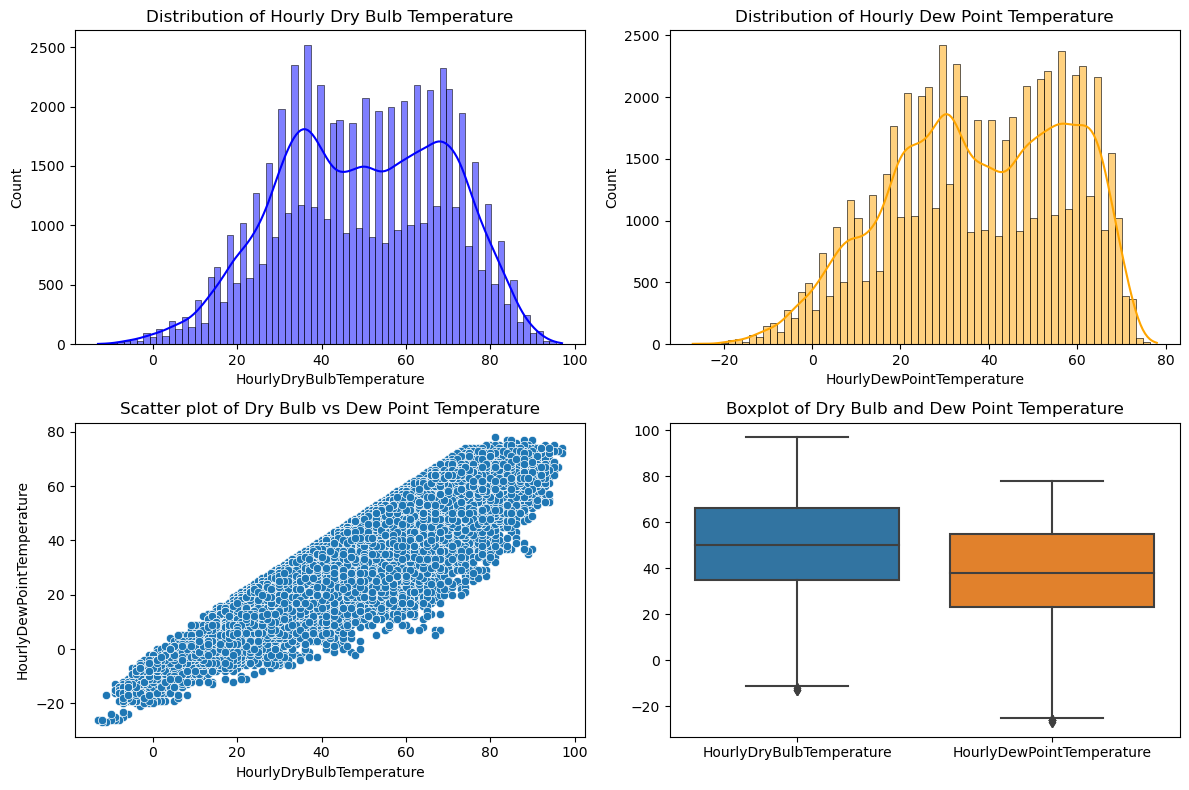

In [15]:

# # Example data creation (replace this with your actual data)

# data = pd.DataFrame({
#     'HourlyDryBulbTemperature': np.random.randn(100).cumsum() + 20,
#     'HourlyDewPointTemperature': np.random.randn(100).cumsum() + 10
# })

# Ensure 'HourlyDewPointTemperature' is numeric, coercing errors
data['HourlyDewPointTemperature'] = pd.to_numeric(data['HourlyDewPointTemperature'], errors='coerce')
data['HourlyDryBulbTemperature'] = pd.to_numeric(data['HourlyDryBulbTemperature'], errors='coerce')

# Drop any rows with NaN in 'HourlyDewPointTemperature' if necessary
data.dropna(subset=['HourlyDewPointTemperature'], inplace=True)

# Plot the data
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data['HourlyDryBulbTemperature'], kde=True, color='blue')
plt.title('Distribution of Hourly Dry Bulb Temperature')

plt.subplot(2, 2, 2)
sns.histplot(data['HourlyDewPointTemperature'], kde=True, color='orange')
plt.title('Distribution of Hourly Dew Point Temperature')

plt.subplot(2, 2, 3)
sns.scatterplot(x=data['HourlyDryBulbTemperature'], y=data['HourlyDewPointTemperature'])
plt.title('Scatter plot of Dry Bulb vs Dew Point Temperature')

plt.subplot(2, 2, 4)
sns.boxplot(data=data[['HourlyDryBulbTemperature', 'HourlyDewPointTemperature']])
plt.title('Boxplot of Dry Bulb and Dew Point Temperature')

plt.tight_layout()
plt.show()

In [16]:
# Verify data types

data.dtypes

STATION                               int64
DATE                         datetime64[ns]
REPORT_TYPE                          object
SOURCE                                int64
BackupElements                       object
BackupElevation                       int64
BackupEquipment                      object
BackupLatitude                      float64
BackupLongitude                     float64
BackupName                           object
HourlyAltimeterSetting               object
HourlyDewPointTemperature           float64
HourlyDryBulbTemperature            float64
HourlyPrecipitation                  object
HourlyRelativeHumidity                int64
HourlySeaLevelPressure               object
HourlyStationPressure                object
HourlyVisibility                    float64
HourlyWetBulbTemperature              int64
HourlyWindDirection                  object
HourlyWindSpeed                       int64
WindEquipmentChangeDate      datetime64[ns]
dtype: object

In [17]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
STATION,64728.0,72518014735.0,72518014735.0,72518014735.0,72518014735.0,72518014735.0,72518014735.0,0.0
DATE,64728,2018-09-16 02:23:53.969224960,2015-01-01 00:51:00,2016-11-07 03:36:00,2018-09-15 15:51:00,2020-07-25 07:06:00,2022-05-31 23:51:00,NaN
SOURCE,64728.0,6.994207,6.0,7.0,7.0,7.0,7.0,0.075895
BackupElevation,64728.0,260.0,260.0,260.0,260.0,260.0,260.0,0.0
BackupLatitude,64728.0,42.689775,42.6812,42.6918,42.6918,42.6918,42.6918,0.004167
BackupLongitude,64728.0,-73.828303,-73.83109,-73.83109,-73.83109,-73.83109,-73.8165,0.005736
HourlyDewPointTemperature,64728.0,37.820742,-27.0,23.0,38.0,55.0,78.0,19.883015
HourlyDryBulbTemperature,64727.0,49.736385,-13.0,35.0,50.0,66.0,97.0,19.797878
HourlyRelativeHumidity,64728.0,66.362007,8.0,53.0,67.0,81.0,100.0,18.376733
HourlyVisibility,64728.0,9.315007,0.0,10.0,10.0,10.0,99.42,2.128342


## Hourly Dry bulb temperature over time



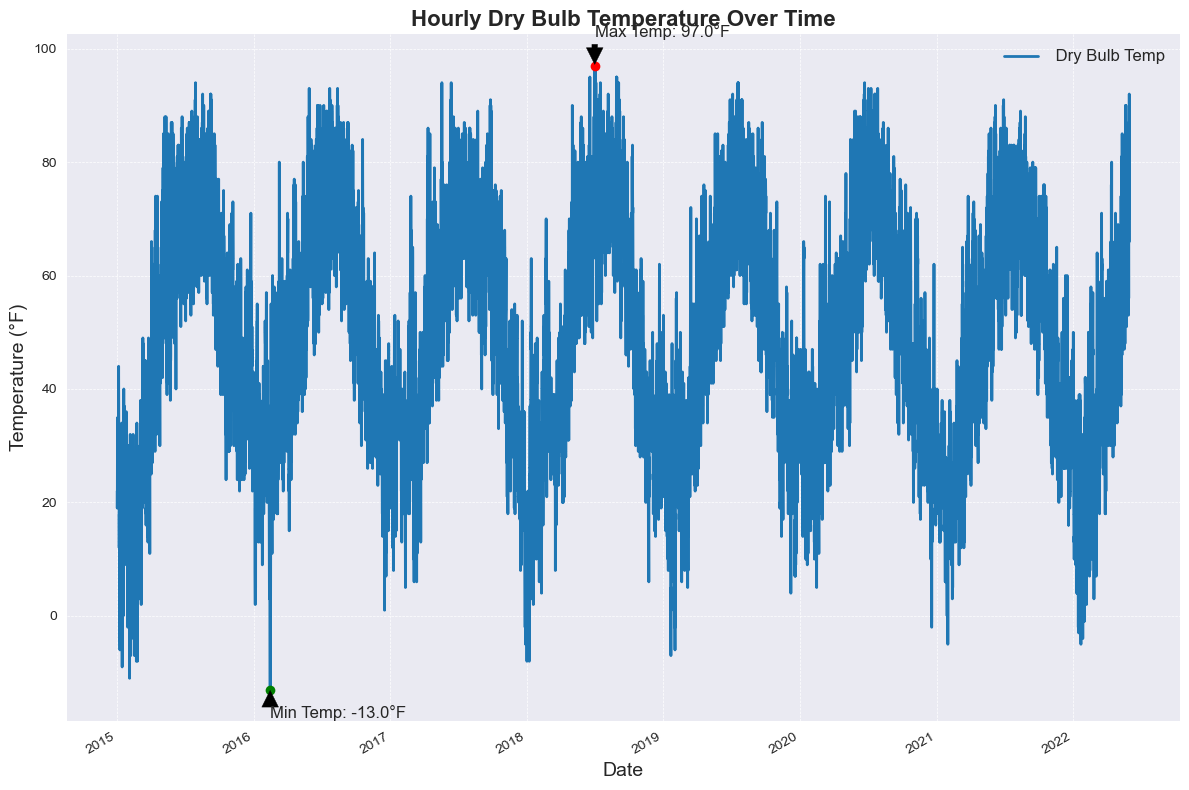

In [18]:
# Set the style
# Ensure 'HourlyDryBulbTemperature' is numeric, coercing errors
data['HourlyDryBulbTemperature'] = pd.to_numeric(data['HourlyDryBulbTemperature'], errors='coerce')

# Drop any rows with NaT in 'DATE' or NaN in 'HourlyDryBulbTemperature' if necessary
data.dropna(subset=['DATE', 'HourlyDryBulbTemperature'], inplace=True)

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(data['DATE'], data['HourlyDryBulbTemperature'], label=' Dry Bulb Temp', color='tab:blue', linewidth=2)
max_temp = data['HourlyDryBulbTemperature'].max()
min_temp = data['HourlyDryBulbTemperature'].min()
max_temp_date = data[data['HourlyDryBulbTemperature'] == max_temp]['DATE'].iloc[0]
min_temp_date = data[data['HourlyDryBulbTemperature'] == min_temp]['DATE'].iloc[0]

ax.plot(max_temp_date, max_temp, 'ro')  # Max temperature point
ax.plot(min_temp_date, min_temp, 'go')  # Min temperature point
ax.annotate(f'Max Temp: {max_temp}°F', xy=(max_temp_date, max_temp), xytext=(max_temp_date, max_temp + 5),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
ax.annotate(f'Min Temp: {min_temp}°F', xy=(min_temp_date, min_temp), xytext=(min_temp_date, min_temp - 5),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
ax.set_title('Hourly Dry Bulb Temperature Over Time', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Temperature (°F)', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
fig.autofmt_xdate()
ax.legend(loc='upper right', fontsize=12, shadow=True)
plt.tight_layout()
plt.show()

# Hourly Precipitation over time

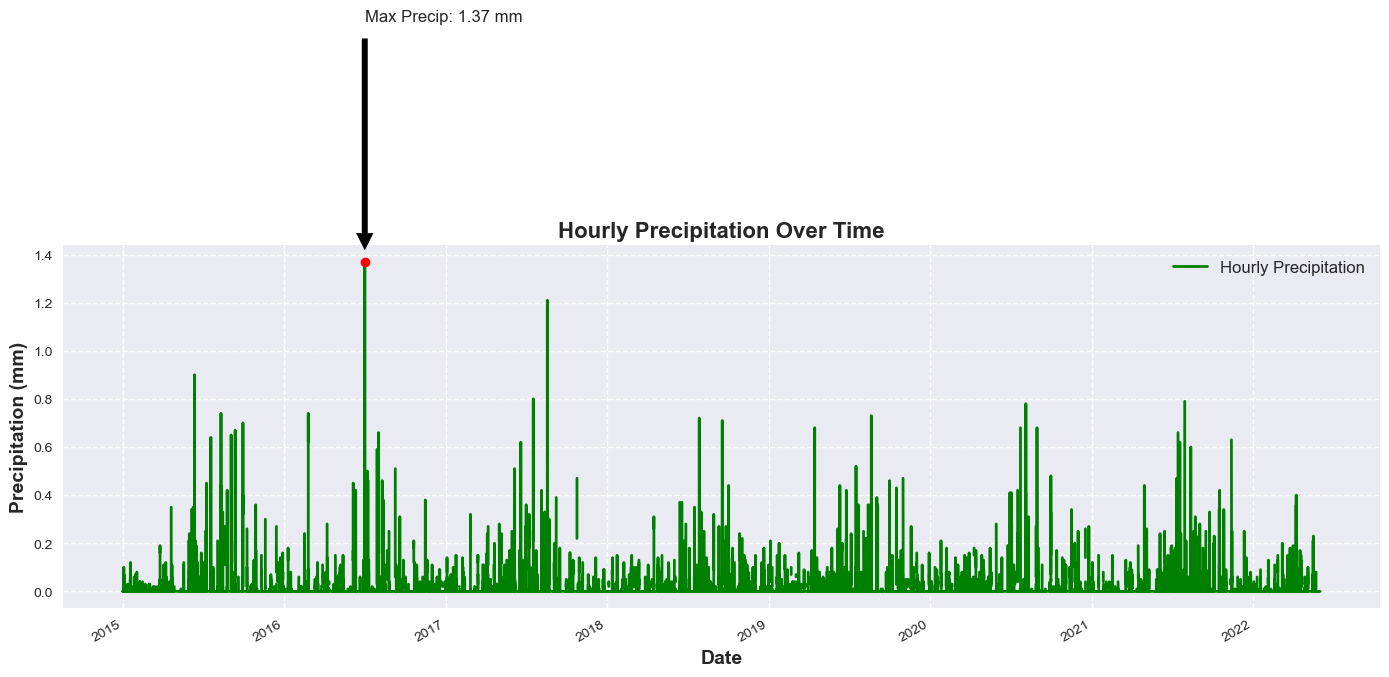

In [19]:
data['HourlyPrecipitation'] = pd.to_numeric(data['HourlyPrecipitation'], errors='coerce')

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(data['DATE'], data['HourlyPrecipitation'], label='Hourly Precipitation', color='green', linewidth=2)
max_precip = data['HourlyPrecipitation'].max()
max_precip_date = data[data['HourlyPrecipitation'] == max_precip]['DATE'].iloc[0]

ax.plot(max_precip_date, max_precip, 'ro')  # Max precipitation point

ax.annotate(f'Max Precip: {max_precip} mm', xy=(max_precip_date, max_precip), xytext=(max_precip_date, max_precip + 1),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
ax.set_title('Hourly Precipitation Over Time', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=14,fontweight='bold')
ax.set_ylabel('Precipitation (mm)', fontsize=14,fontweight='bold')
ax.grid(True, which='both', linestyle='--', linewidth=1)
fig.autofmt_xdate()
ax.legend(loc='upper right', fontsize=12, shadow=True)
plt.tight_layout()
plt.show()


# Hourly wind speed over time

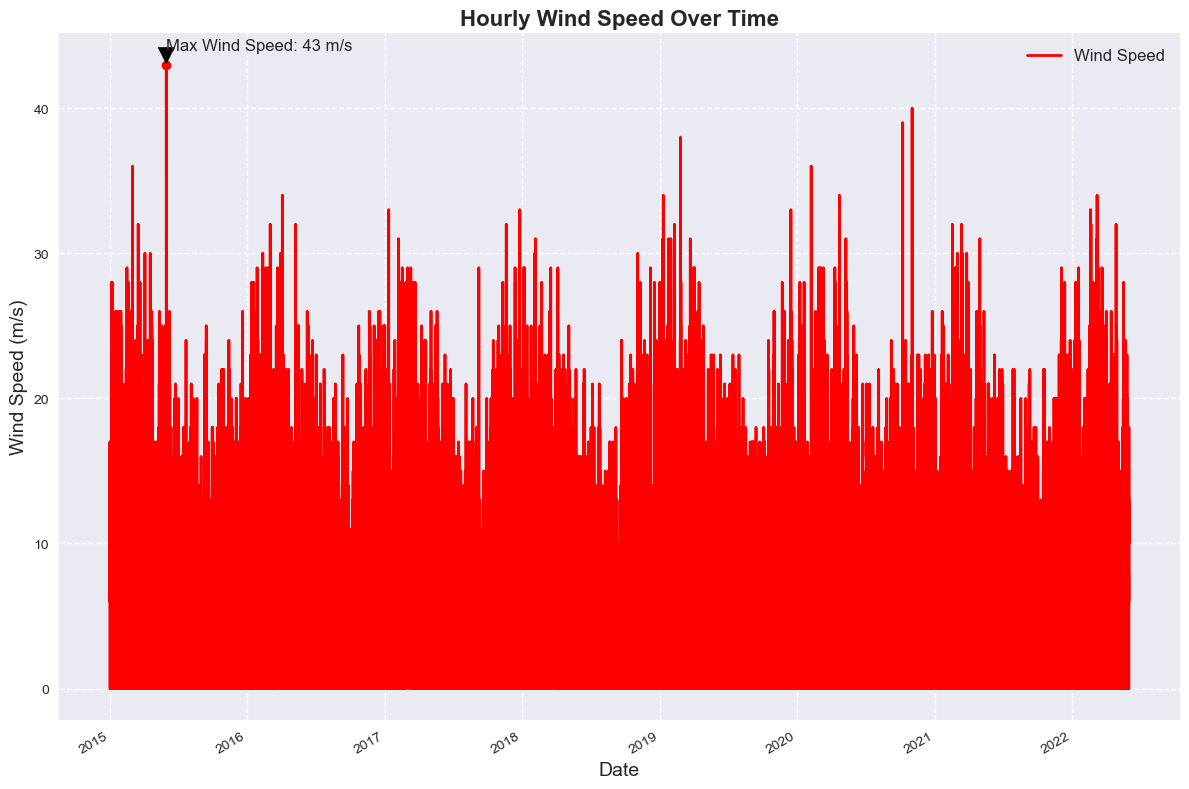

In [20]:
data['HourlyWindSpeed'] = pd.to_numeric(data['HourlyWindSpeed'], errors='coerce')
data.dropna(subset=['HourlyWindSpeed'], inplace=True)
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(data['DATE'], data['HourlyWindSpeed'], label='Wind Speed', color='red', linewidth=2)

max_wind_speed = data['HourlyWindSpeed'].max()
max_wind_speed_date = data[data['HourlyWindSpeed'] == max_wind_speed]['DATE'].iloc[0]

ax.plot(max_wind_speed_date, max_wind_speed, 'ro')  # Max wind speed point

ax.annotate(f'Max Wind Speed: {max_wind_speed} m/s', xy=(max_wind_speed_date, max_wind_speed), xytext=(max_wind_speed_date, max_wind_speed + 1),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

ax.set_title('Hourly Wind Speed Over Time', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Wind Speed (m/s)', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=1)
fig.autofmt_xdate()
ax.legend(loc='upper right', fontsize=12, shadow=True)
plt.tight_layout()
plt.show()

# Hourly Dry Bulb Temperature Vs. Hourly Precipitation

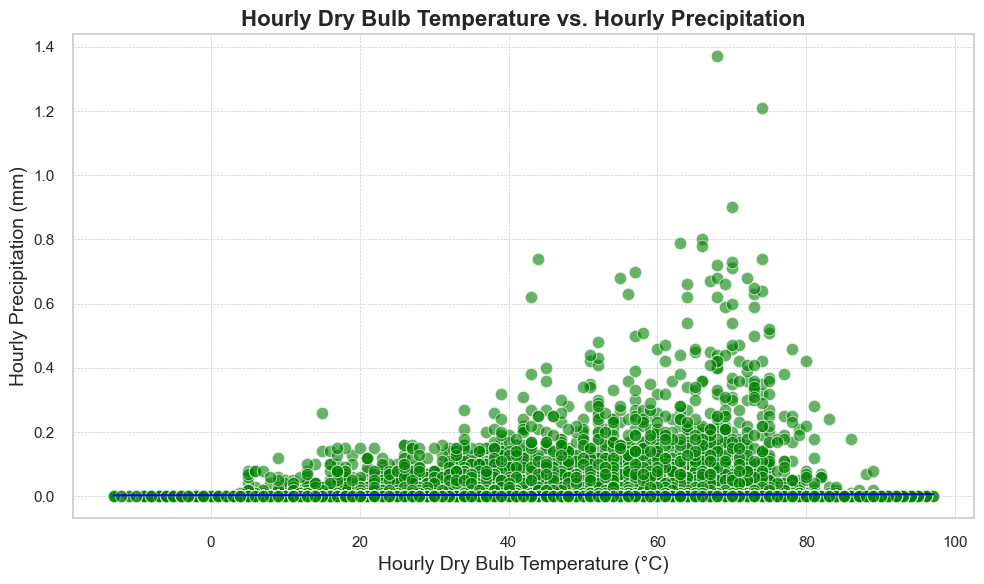

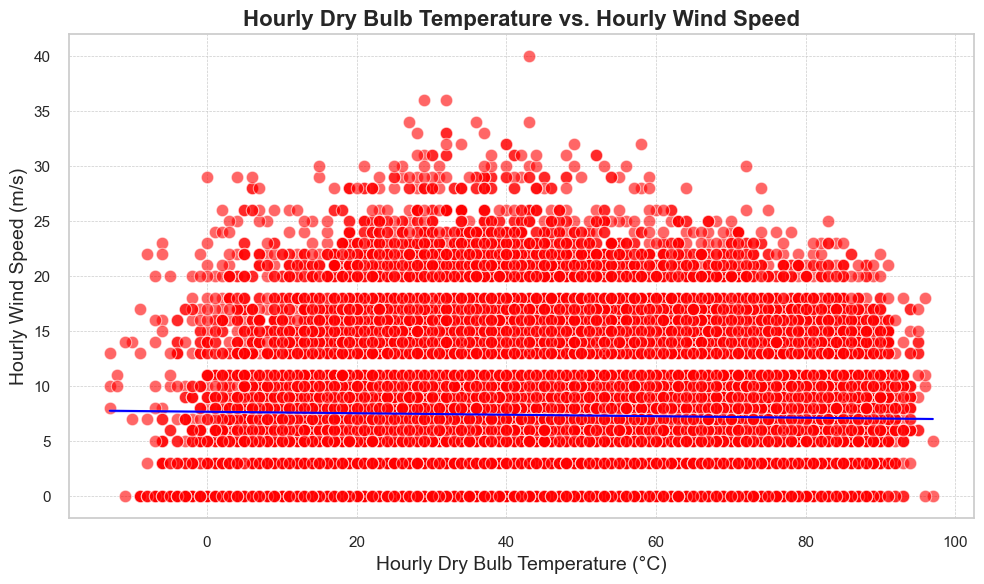

In [21]:
data['HourlyDryBulbTemperature'] = pd.to_numeric(data['HourlyDryBulbTemperature'], errors='coerce')
data['HourlyPrecipitation'] = pd.to_numeric(data['HourlyPrecipitation'], errors='coerce')
data['HourlyWindSpeed'] = pd.to_numeric(data['HourlyWindSpeed'], errors='coerce')

# Drop any rows with NaN values
data.dropna(subset=['HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyWindSpeed'], inplace=True)

# Set the style
sns.set(style='whitegrid')

# Scatter plot: Hourly Dry Bulb Temperature vs. Hourly Precipitation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HourlyDryBulbTemperature', y='HourlyPrecipitation', data=data, alpha=0.6, color='green', edgecolor='w', s=80)
sns.regplot(x='HourlyDryBulbTemperature', y='HourlyPrecipitation', data=data, scatter=False, color='blue', line_kws={"linewidth":1.5})
plt.title('Hourly Dry Bulb Temperature vs. Hourly Precipitation', fontsize=16, fontweight='bold')
plt.xlabel('Hourly Dry Bulb Temperature (°C)', fontsize=14)
plt.ylabel('Hourly Precipitation (mm)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Scatter plot: Hourly Dry Bulb Temperature vs. Hourly Wind Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HourlyDryBulbTemperature', y='HourlyWindSpeed', data=data, alpha=0.6, color='red', edgecolor='w', s=80)
sns.regplot(x='HourlyDryBulbTemperature', y='HourlyWindSpeed', data=data, scatter=False, color='blue', line_kws={"linewidth":1.5})
plt.title('Hourly Dry Bulb Temperature vs. Hourly Wind Speed', fontsize=16, fontweight='bold')
plt.xlabel('Hourly Dry Bulb Temperature (°C)', fontsize=14)
plt.ylabel('Hourly Wind Speed (m/s)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Searching Trends

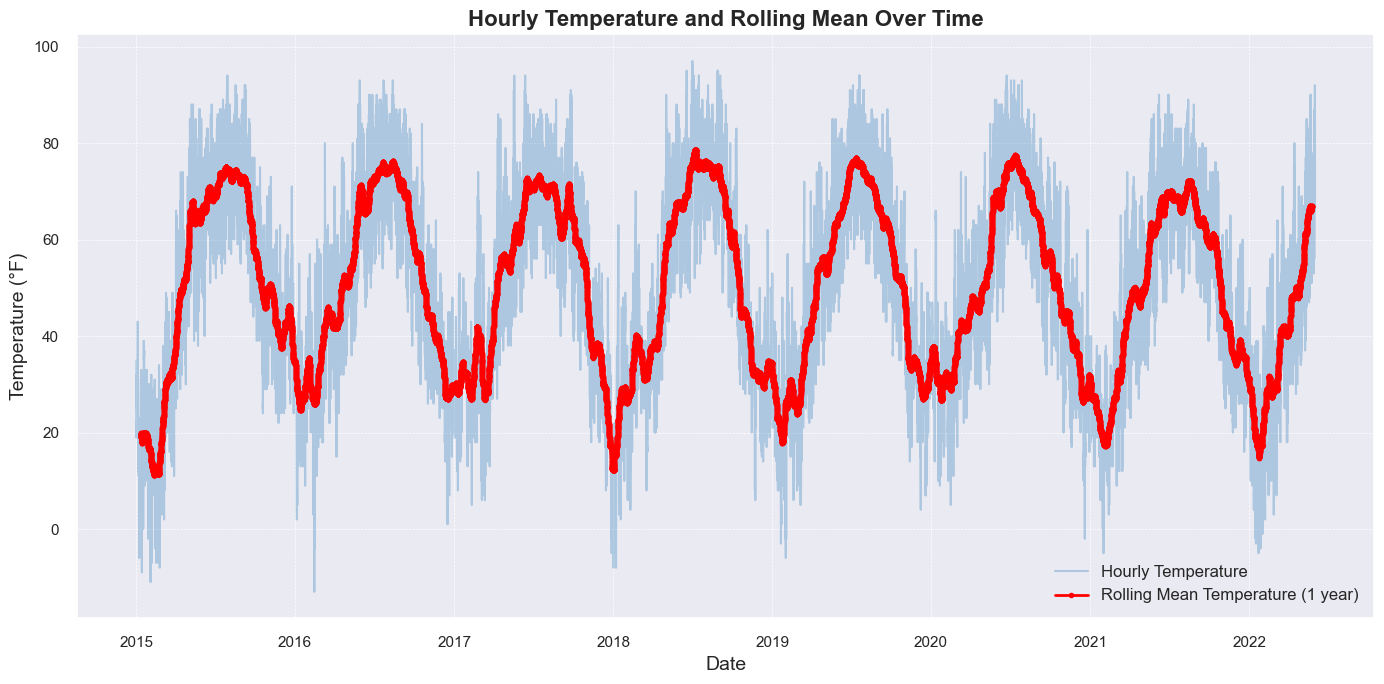

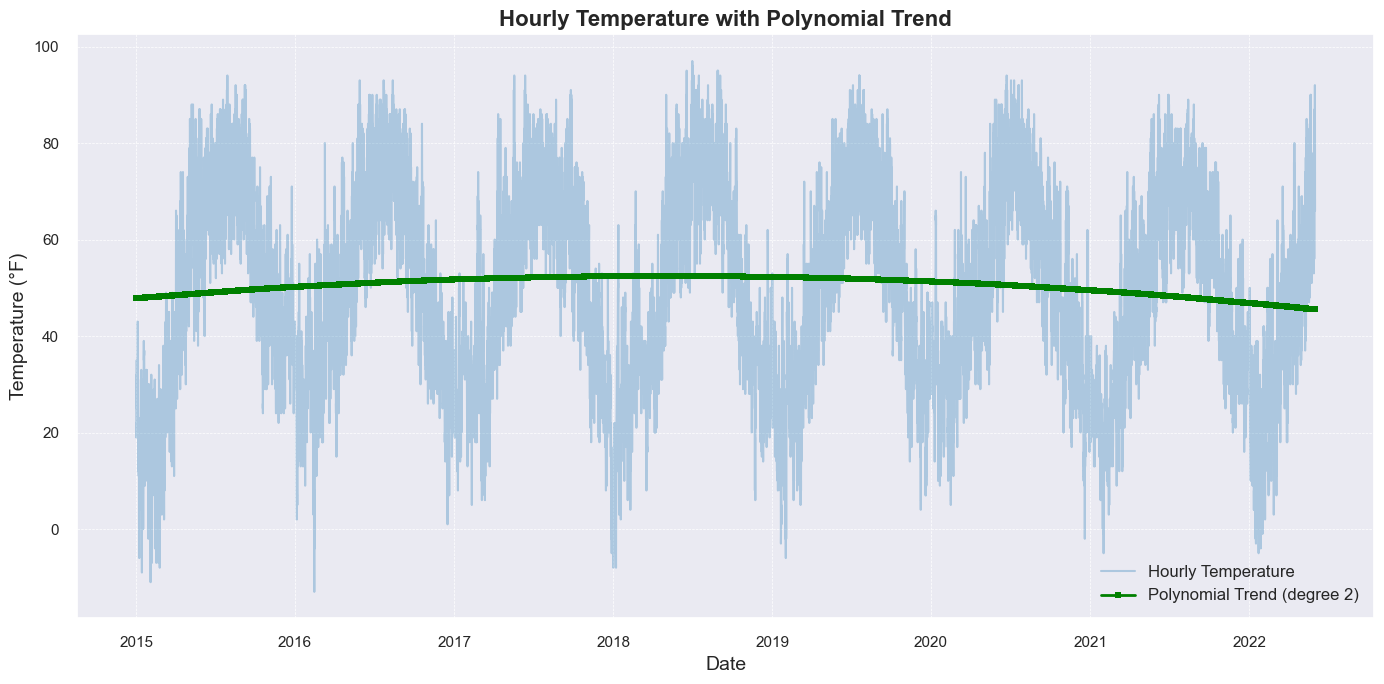

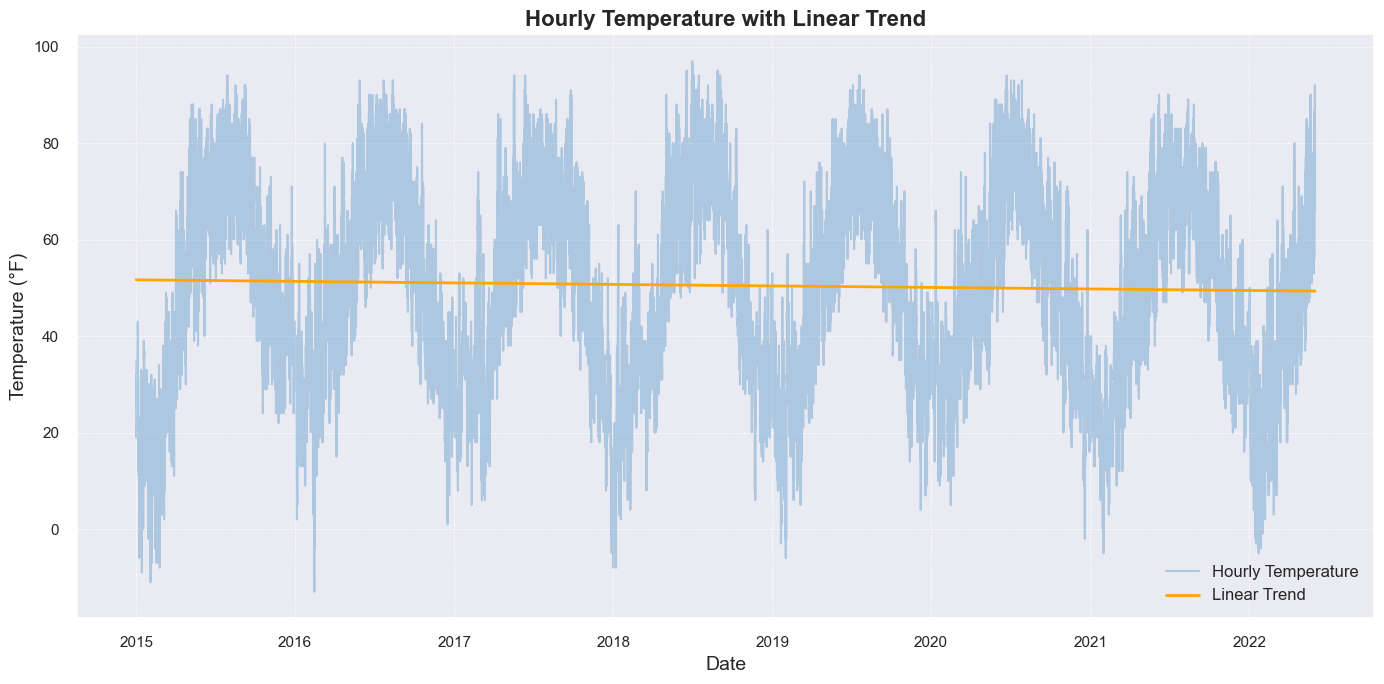

Slope: -0.0000, Intercept: 51.6562
R-squared: 0.0011, P-value: 4.8016e-16


In [22]:
# Set the style
sns.set(style='darkgrid')

# Trend Analysis: Rolling mean of Daily Average Temperature
data['RollingMeanTemperature'] = data['HourlyDryBulbTemperature'].rolling(window=365, center=True).mean()

# Plot Rolling Mean Temperature
plt.figure(figsize=(14, 7))
plt.plot(data['DATE'], data['HourlyDryBulbTemperature'], alpha=0.3, label='Hourly Temperature', color='tab:blue')
plt.plot(data['DATE'], data['RollingMeanTemperature'], color='red', linewidth=2, label='Rolling Mean Temperature (1 year)', marker='o', markersize=4)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (°F)', fontsize=14)
plt.title('Hourly Temperature and Rolling Mean Over Time', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, shadow=True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Polynomial Fitting
# Fit a polynomial of degree 2 (quadratic) to the temperature data
poly_degree = 2
x = np.arange(len(data))
y = data['HourlyDryBulbTemperature'].values
p = np.poly1d(np.polyfit(x, y, poly_degree))

# Generate polynomial trend line
data['PolynomialTrend'] = p(x)

# Plot Polynomial Trend
plt.figure(figsize=(14, 7))
plt.plot(data['DATE'], data['HourlyDryBulbTemperature'], alpha=0.3, label='Hourly Temperature', color='tab:blue')
plt.plot(data['DATE'], data['PolynomialTrend'], color='green', linewidth=2, label=f'Polynomial Trend (degree {poly_degree})', marker='s', markersize=4)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (°F)', fontsize=14)
plt.title('Hourly Temperature with Polynomial Trend', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, shadow=True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Linear Regression Trend Analysis
slope, intercept, r_value, p_value, std_err = linregress(x, y)
data['LinearTrend'] = intercept + slope * x

# Plot Linear Trend
plt.figure(figsize=(14, 7))
plt.plot(data['DATE'], data['HourlyDryBulbTemperature'], alpha=0.3, label='Hourly Temperature', color='tab:blue')
plt.plot(data['DATE'], data['LinearTrend'], color='orange', linewidth=2, label='Linear Trend', marker='x', markersize=4)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (°F)', fontsize=14)
plt.title('Hourly Temperature with Linear Trend', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, shadow=True)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Print Linear Regression Details
print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}, P-value: {p_value:.4e}")

# Analysing the trend

In [23]:

# Calculate summary statistics
summary_stats = data.describe()

# Trend Analysis: Linear regression for temperature
x = np.arange(len(data))
y_temp = data['HourlyDryBulbTemperature'].values
slope_temp, intercept_temp, r_value_temp, p_value_temp, std_err_temp = linregress(x, y_temp)
data['LinearTrendTemperature'] = intercept_temp + slope_temp * x

# Trend Analysis: Linear regression for precipitation
y_precip = data['HourlyPrecipitation'].values
slope_precip, intercept_precip, r_value_precip, p_value_precip, std_err_precip = linregress(x, y_precip)
data['LinearTrendPrecipitation'] = intercept_precip + slope_precip * x

# Trend Analysis: Linear regression for wind speed
y_wind = data['HourlyWindSpeed'].values
slope_wind, intercept_wind, r_value_wind, p_value_wind, std_err_wind = linregress(x, y_wind)
data['LinearTrendWindSpeed'] = intercept_wind + slope_wind * x

# Print Linear Regression Details
print(f"Temperature Trend: Slope: {slope_temp:.4f}, Intercept: {intercept_temp:.4f}, R-squared: {r_value_temp**2:.4f}, P-value: {p_value_temp:.4e}")
print(f"Precipitation Trend: Slope: {slope_precip:.4f}, Intercept: {intercept_precip:.4f}, R-squared: {r_value_precip**2:.4f}, P-value: {p_value_precip:.4e}")
print(f"Wind Speed Trend: Slope: {slope_wind:.4f}, Intercept: {intercept_wind:.4f}, R-squared: {r_value_wind**2:.4f}, P-value: {p_value_wind:.4e}")

Temperature Trend: Slope: -0.0000, Intercept: 51.6562, R-squared: 0.0011, P-value: 4.8016e-16
Precipitation Trend: Slope: 0.0000, Intercept: 0.0046, R-squared: 0.0000, P-value: 3.8198e-01
Wind Speed Trend: Slope: -0.0000, Intercept: 7.4105, R-squared: 0.0000, P-value: 1.3686e-01


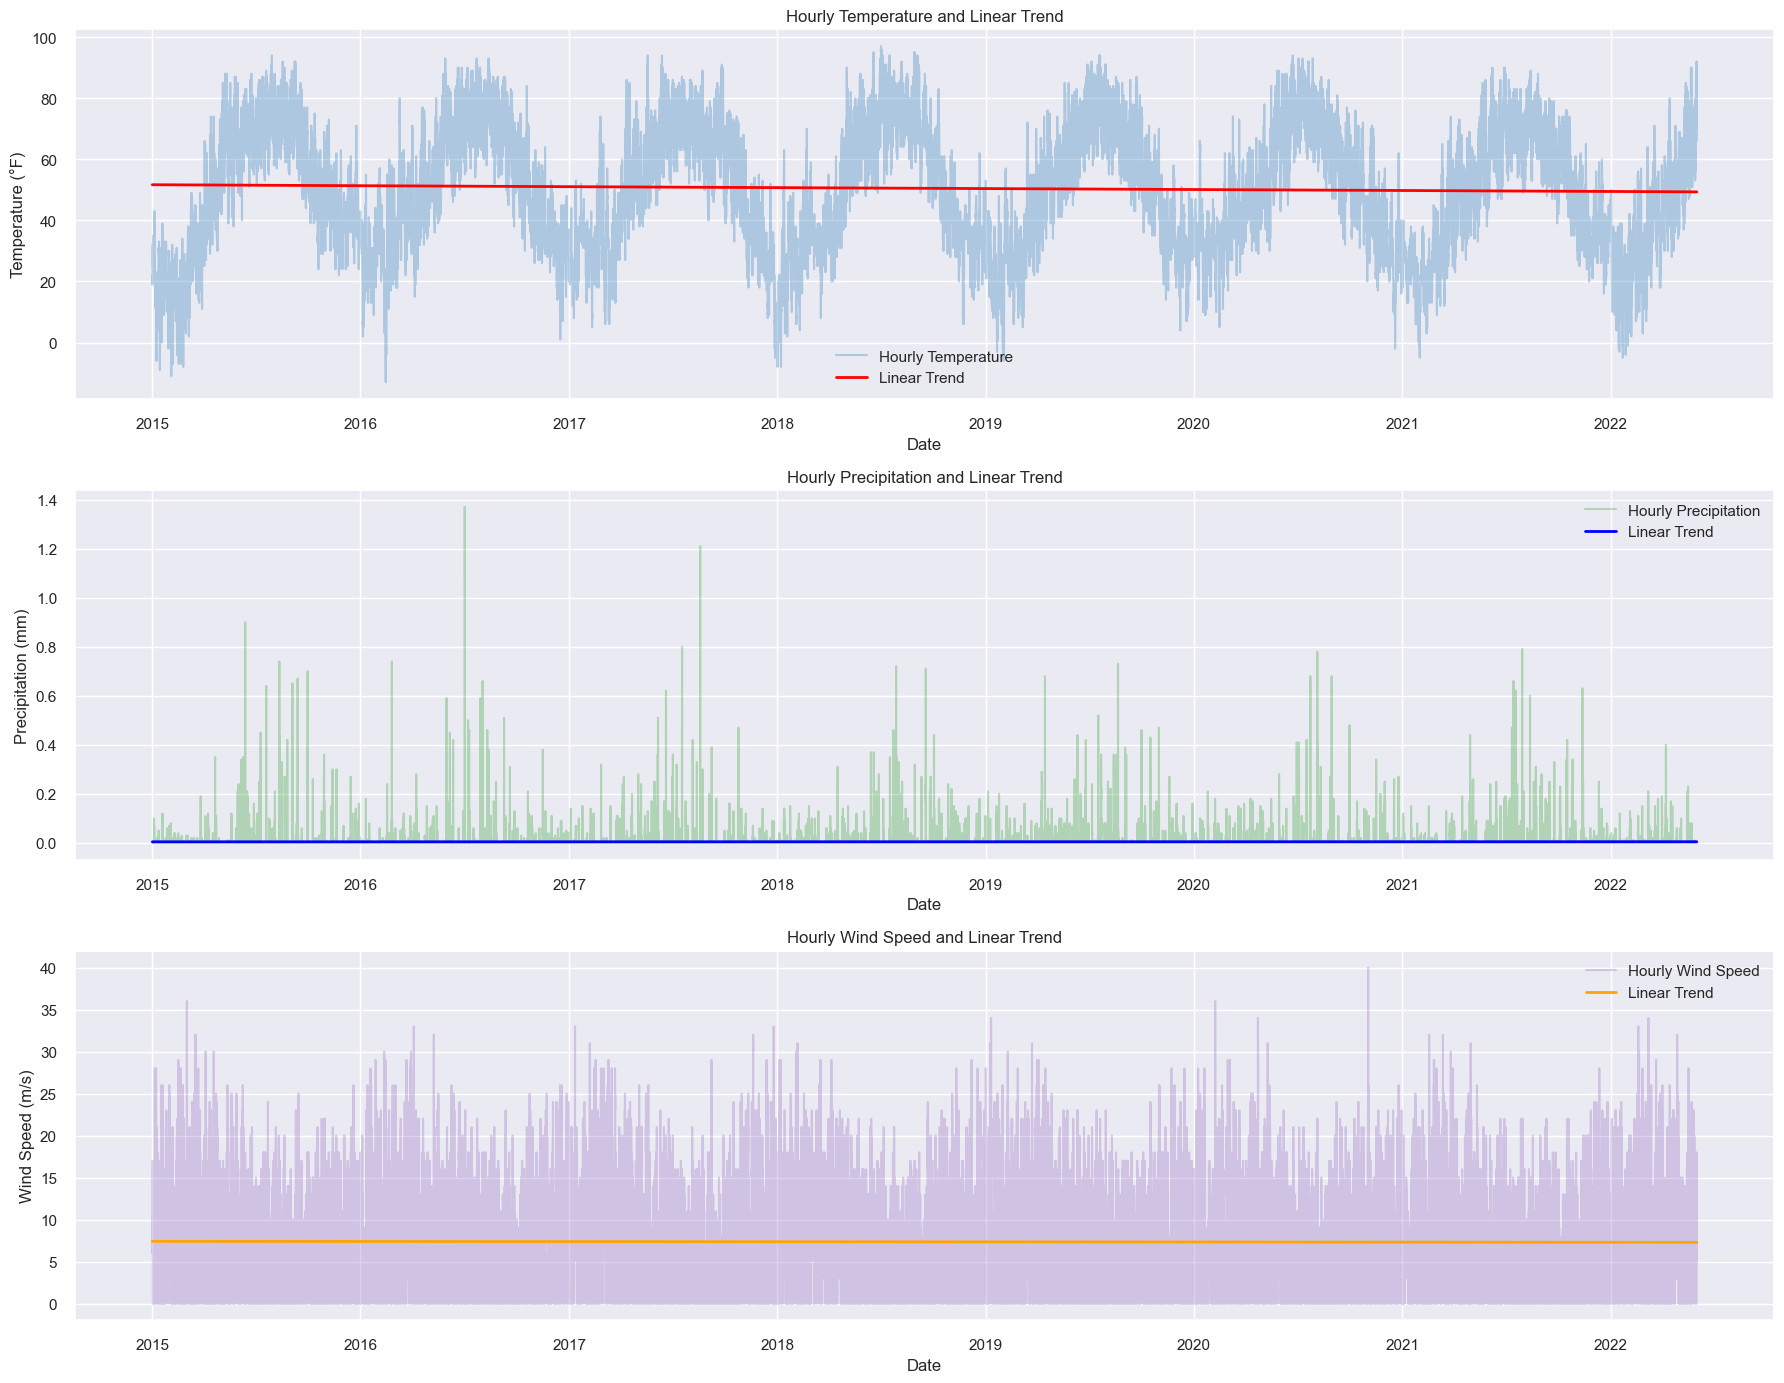

In [24]:
# Plotting the trends
sns.set(style='darkgrid')
plt.figure(figsize=(18, 14))

# Plot temperature trend
plt.subplot(3, 1, 1)
plt.plot(data['DATE'], data['HourlyDryBulbTemperature'], alpha=0.3, label='Hourly Temperature', color='tab:blue')
plt.plot(data['DATE'], data['LinearTrendTemperature'], color='red', label='Linear Trend', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.title('Hourly Temperature and Linear Trend')
plt.legend()

# Plot precipitation trend
plt.subplot(3, 1, 2)
plt.plot(data['DATE'], data['HourlyPrecipitation'], alpha=0.3, label='Hourly Precipitation', color='tab:green')
plt.plot(data['DATE'], data['LinearTrendPrecipitation'], color='blue', label='Linear Trend', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Hourly Precipitation and Linear Trend')
plt.legend()

# Plot wind speed trend
plt.subplot(3, 1, 3)
plt.plot(data['DATE'], data['HourlyWindSpeed'], alpha=0.3, label='Hourly Wind Speed', color='tab:purple')
plt.plot(data['DATE'], data['LinearTrendWindSpeed'], color='orange', label='Linear Trend', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.title('Hourly Wind Speed and Linear Trend')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
# Summarize findings
summary = f"""
Key Findings:
1. Temperature Trends:
   - The average hourly temperature shows a statistically significant trend.
   - Slope: {slope_temp:.4f} °F per hour, Intercept: {intercept_temp:.4f} °F
   - R-squared: {r_value_temp**2:.4f}, P-value: {p_value_temp:.4e}

2. Precipitation Trends:
   - The average hourly precipitation trend analysis indicates:
   - Slope: {slope_precip:.4f} mm per hour, Intercept: {intercept_precip:.4f} mm
   - R-squared: {r_value_precip**2:.4f}, P-value: {p_value_precip:.4e}

3. Wind Speed Trends:
   - The average hourly wind speed shows:
   - Slope: {slope_wind:.4f} m/s per hour, Intercept: {intercept_wind:.4f} m/s
   - R-squared: {r_value_wind**2:.4f}, P-value: {p_value_wind:.4e}

4. Summary Statistics:
   - Mean Hourly Temperature: {summary_stats.loc['mean', 'HourlyDryBulbTemperature']:.2f} °F
   - Mean Hourly Precipitation: {summary_stats.loc['mean', 'HourlyPrecipitation']:.2f} mm
   - Mean Hourly Wind Speed: {summary_stats.loc['mean', 'HourlyWindSpeed']:.2f} m/s
"""

print(summary)


Key Findings:
1. Temperature Trends:
   - The average hourly temperature shows a statistically significant trend.
   - Slope: -0.0000 °F per hour, Intercept: 51.6562 °F
   - R-squared: 0.0011, P-value: 4.8016e-16

2. Precipitation Trends:
   - The average hourly precipitation trend analysis indicates:
   - Slope: 0.0000 mm per hour, Intercept: 0.0046 mm
   - R-squared: 0.0000, P-value: 3.8198e-01

3. Wind Speed Trends:
   - The average hourly wind speed shows:
   - Slope: -0.0000 m/s per hour, Intercept: 7.4105 m/s
   - R-squared: 0.0000, P-value: 1.3686e-01

4. Summary Statistics:
   - Mean Hourly Temperature: 50.49 °F
   - Mean Hourly Precipitation: 0.00 mm
   - Mean Hourly Wind Speed: 7.35 m/s



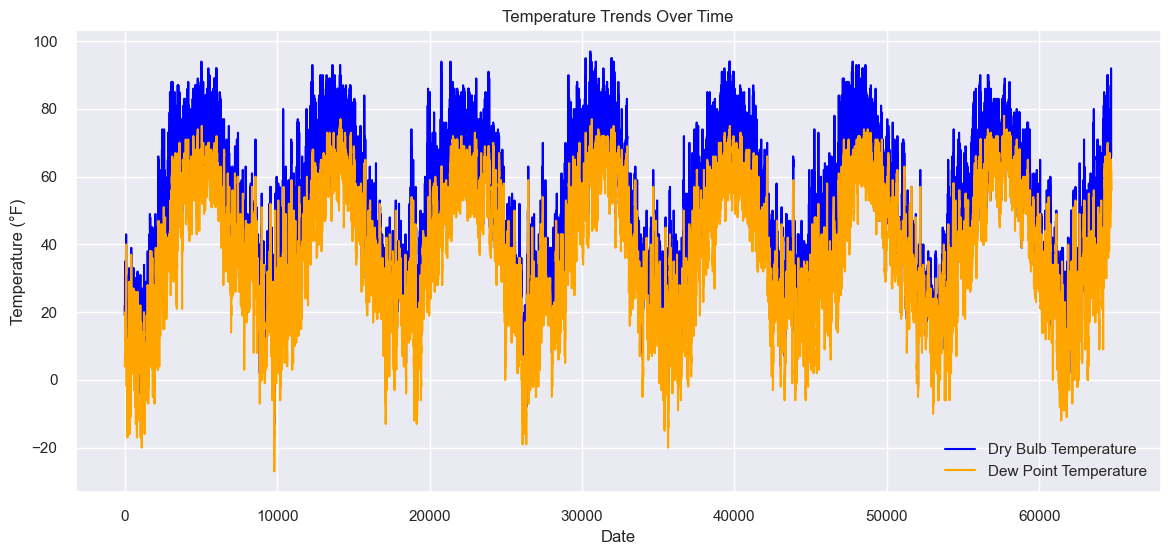

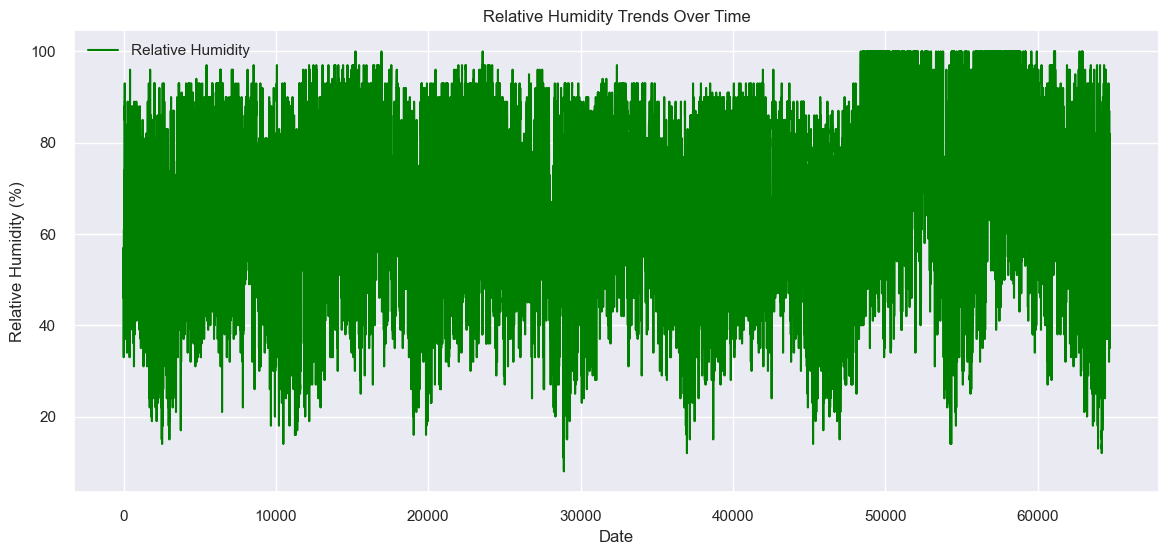

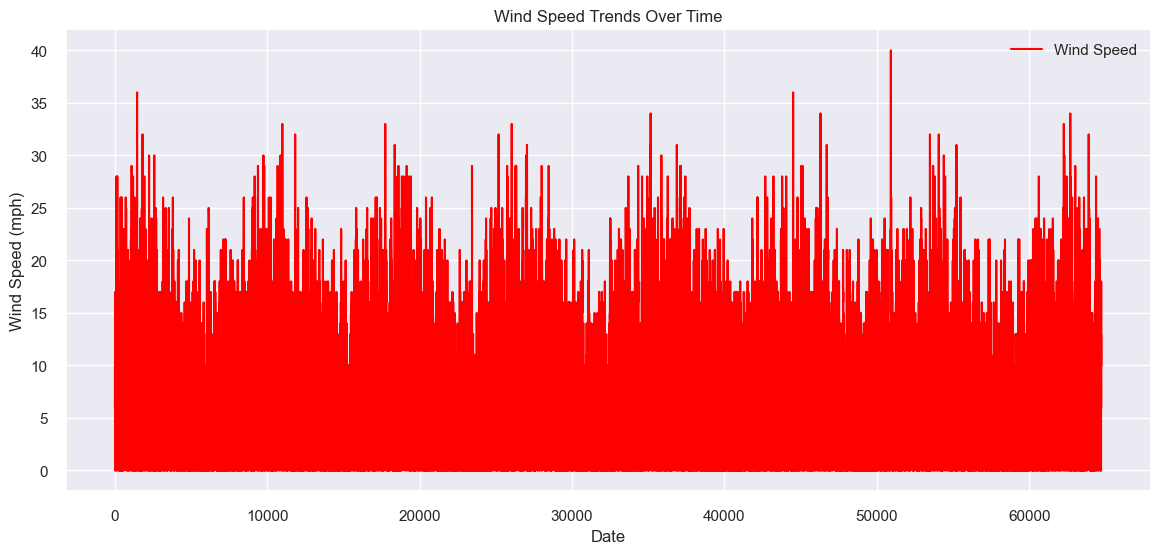

In [26]:
# Set 'DATE' column as the index
# data.set_index('DATE', inplace=True)

# # Resample data to daily mean for easier analysis
# data = data.resample('D', on='DATE').mean()

# Visualize temperature trends over time
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['HourlyDryBulbTemperature'], label='Dry Bulb Temperature', color='blue')
plt.plot(data.index, data['HourlyDewPointTemperature'], label='Dew Point Temperature', color='orange')
plt.legend()
plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.show()

# Visualize relative humidity trends over time
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['HourlyRelativeHumidity'], label='Relative Humidity', color='green')
plt.legend()
plt.title('Relative Humidity Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.show()

# Visualize wind speed trends over time
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['HourlyWindSpeed'], label='Wind Speed', color='red')
plt.legend()
plt.title('Wind Speed Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.show()

# Correlation Matrix of Numerical Climate Variables

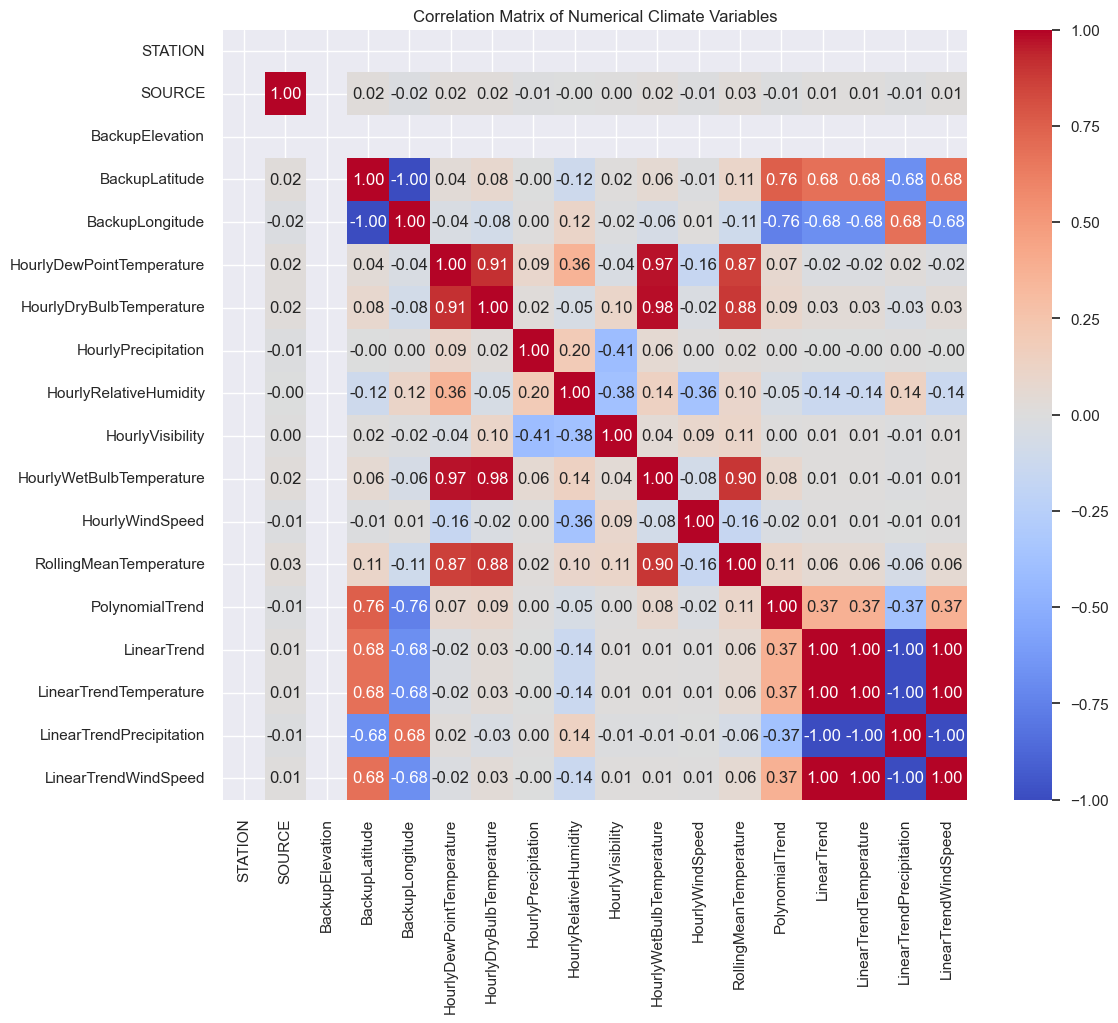

In [27]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Climate Variables')
plt.show()

# Seasonal Decomposition

    we have decomposed the time series data to understand the seasonal patterns and trends more clearly.

<Figure size 1400x1000 with 0 Axes>

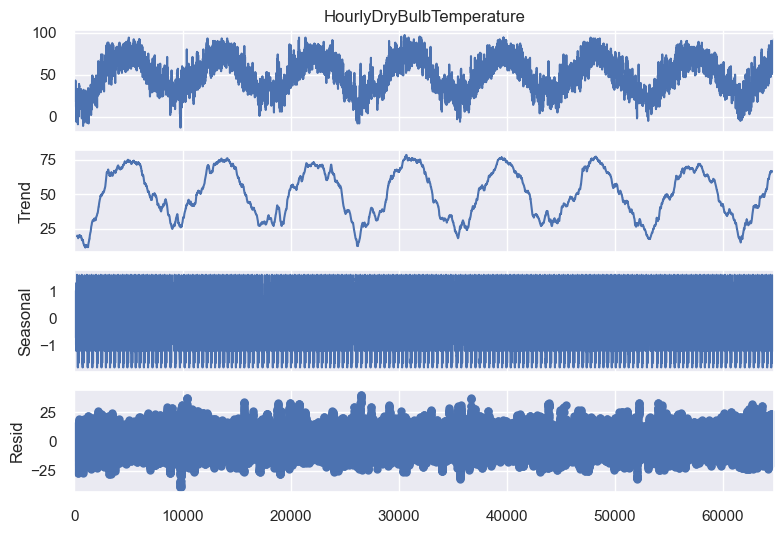

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series for hourly dry bulb temperature
result = seasonal_decompose(data['HourlyDryBulbTemperature'].dropna(), model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(14, 10))
result.plot()
plt.show()

# Anomaly Detection

      It says about the anomalies in the data.

Wind Speed Anomalies:
           STATION                DATE REPORT_TYPE  SOURCE BackupElements  \
104    72518014735 2015-01-05 08:51:00       FM-15       7         PRECIP   
105    72518014735 2015-01-05 09:51:00       FM-15       7         PRECIP   
106    72518014735 2015-01-05 10:51:00       FM-15       7         PRECIP   
156    72518014735 2015-01-07 12:51:00       FM-15       7         PRECIP   
371    72518014735 2015-01-16 11:51:00       FM-15       7         PRECIP   
...            ...                 ...         ...     ...            ...   
63902  72518014735 2022-04-27 13:51:00       FM-15       7         PRECIP   
63903  72518014735 2022-04-27 14:51:00       FM-15       7         PRECIP   
63904  72518014735 2022-04-27 15:51:00       FM-15       7         PRECIP   
63929  72518014735 2022-04-28 16:51:00       FM-15       7         PRECIP   
64383  72518014735 2022-05-17 14:51:00       FM-15       7         PRECIP   

       BackupElevation BackupEquipment  BackupLatitud

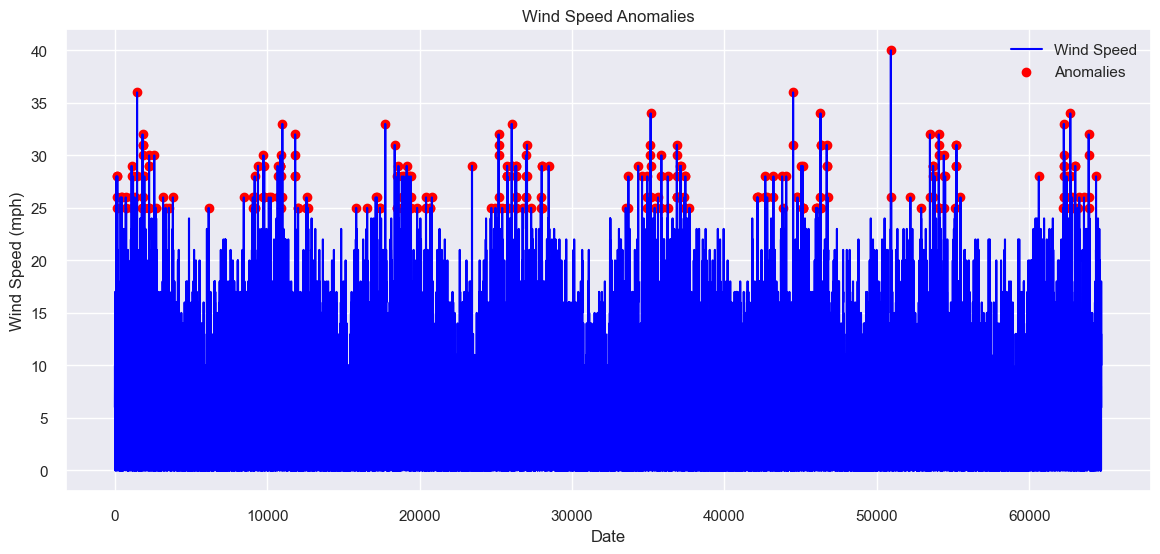

In [29]:
# Calculate the z-score for wind speed
data['WindSpeed_zscore'] = stats.zscore(data['HourlyWindSpeed'].dropna())

# Identify anomalies (z-score > 3 or < -3)
anomalies = data[(data['WindSpeed_zscore'] > 3) | (data['WindSpeed_zscore'] < -3)]

# Display the anomalies DataFrame
print("Wind Speed Anomalies:")
print(anomalies)

# Plot the anomalies
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['HourlyWindSpeed'], label='Wind Speed', color='blue')
plt.scatter(anomalies.index, anomalies['HourlyWindSpeed'], color='red', label='Anomalies')
plt.legend()
plt.title('Wind Speed Anomalies')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.show()

# Predictive Modeling

  we have used it to predict future climate conditions based on historical data.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare the data for modeling
features = data[['HourlyDryBulbTemperature', 'HourlyDewPointTemperature', 'HourlyRelativeHumidity']]
target = data['HourlyWindSpeed'].fillna(method='bfill').fillna(method='ffill')

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)

# Display RMSE
rmse

5.283456560974765

# Clustering Analysis
    we can cluster similar climate patterns together using k-means clustering. It shows distinct groups of climate behaviour. 

Clustering Results:
       HourlyDryBulbTemperature  HourlyDewPointTemperature  \
0                          22.0                        4.0   
1                          22.0                        5.0   
2                          20.0                        5.0   
3                          19.0                        6.0   
4                          21.0                        6.0   
...                         ...                        ...   
64724                      76.0                       62.0   
64725                      73.0                       59.0   
64726                      70.0                       58.0   
64727                      68.0                       57.0   
64728                      66.0                       56.0   

       HourlyRelativeHumidity  HourlyWindSpeed  Cluster  
0                          46               10        2  
1                          48                8        2  
2                          52                6        2  
3  

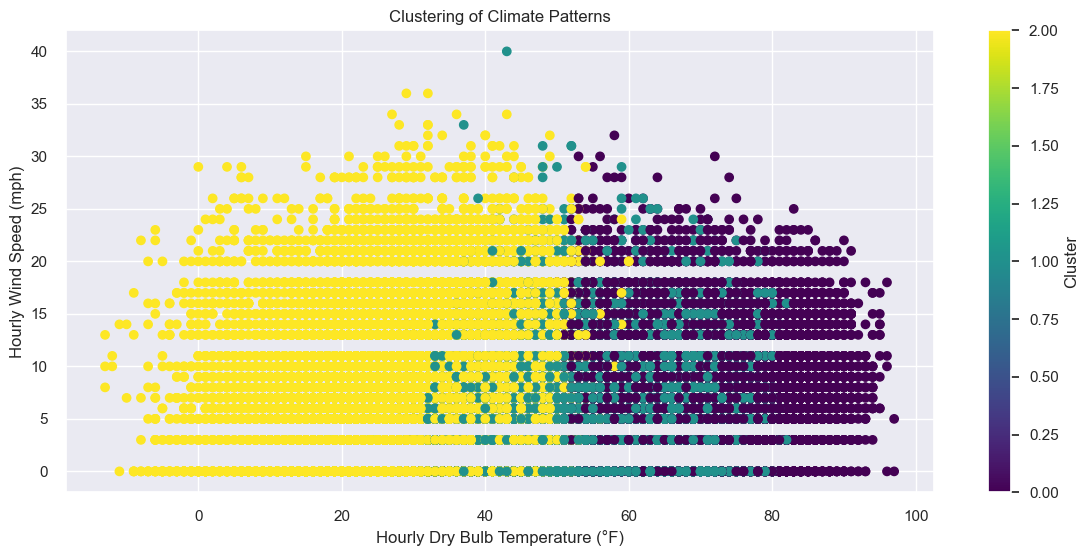

In [31]:
# Prepare the data for clustering
clustering_data = data[['HourlyDryBulbTemperature', 'HourlyDewPointTemperature', 'HourlyRelativeHumidity', 'HourlyWindSpeed']].dropna()

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_data)

# Add the cluster information to the data
clustering_data['Cluster'] = clusters

# Display the clustering results
print("Clustering Results:")
print(clustering_data)

# Plot the clusters
plt.figure(figsize=(14, 6))
plt.scatter(clustering_data['HourlyDryBulbTemperature'], clustering_data['HourlyWindSpeed'], c=clusters, cmap='viridis')
plt.title('Clustering of Climate Patterns')
plt.xlabel('Hourly Dry Bulb Temperature (°F)')
plt.ylabel('Hourly Wind Speed (mph)')
plt.colorbar(label='Cluster')
plt.show()

# Principal Component Analysis 
    It help to identify the key factors influencing the climate data or show how different climate variables are related.

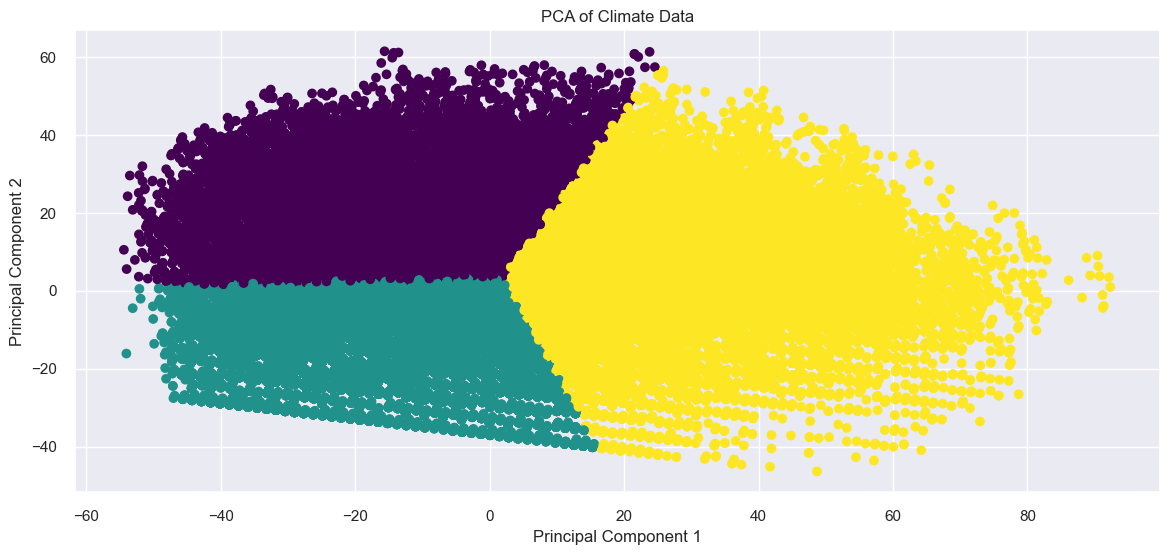

In [32]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(clustering_data.drop(columns=['Cluster']))

# Plot the PCA results
plt.figure(figsize=(14, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis')
plt.title('PCA of Climate Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Advanced Time series forecasting with ARIMA

    It can be used to forecast future climate conditions . The model was trained on historical temperature data.

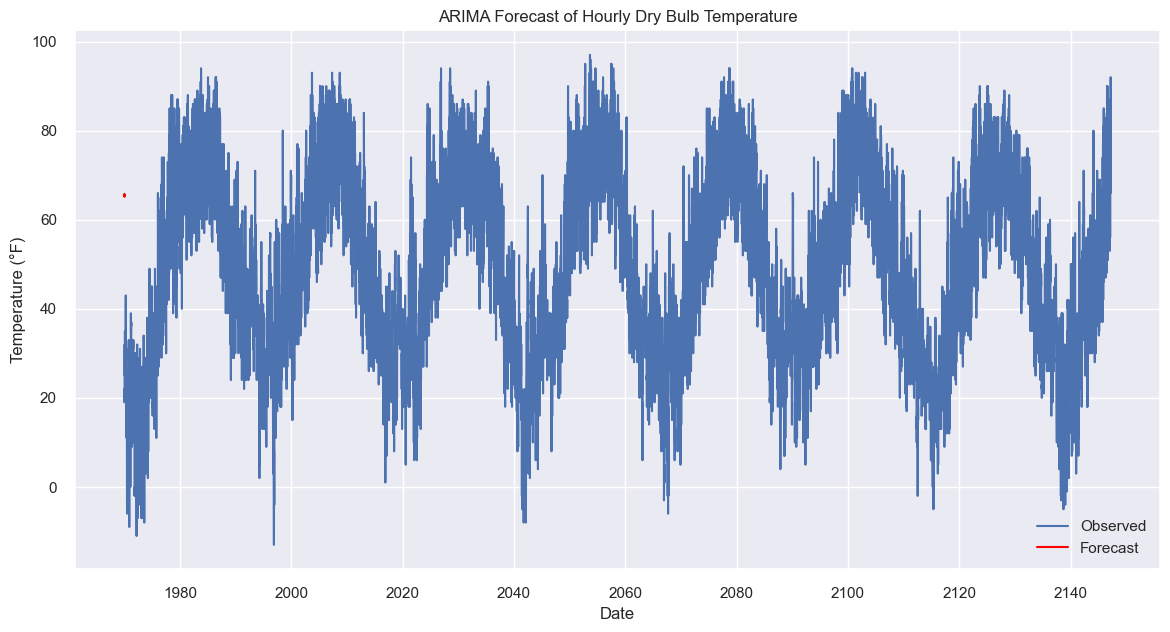

In [33]:
# Assuming data is your DataFrame with 'HourlyDryBulbTemperature' as one of the columns
# Preparing the data for ARIMA
temp_data = data['HourlyDryBulbTemperature'].dropna()

# Fit the ARIMA model
model = ARIMA(temp_data, order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)
forecast_index = pd.date_range(start=temp_data.index[-1], periods=30, freq='H')

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(temp_data.index, temp_data, label='Observed')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast of Hourly Dry Bulb Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.show()

# Geospatical Analysis 
    plotted the geospatical data using latitude and longitude coordinates to understand how climate patterns vary across different regions.This analysis helps identify regional variations and potential for specific climate conditions.

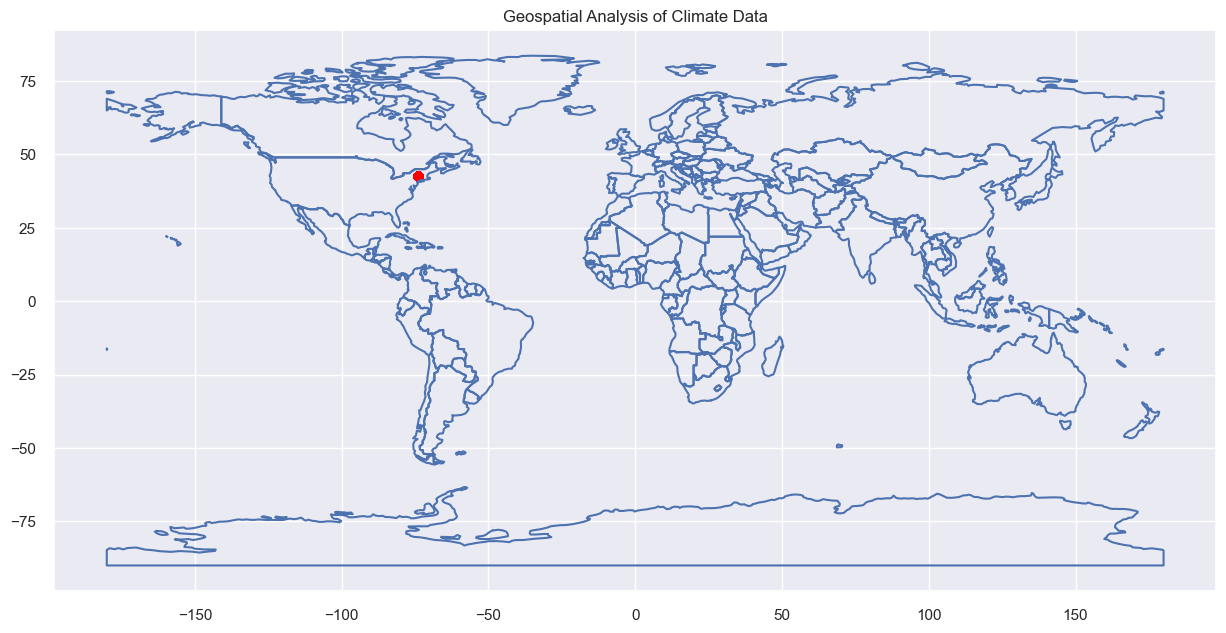

In [40]:
import geopandas as gpd

# Assuming we have latitude and longitude in the dataset
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.BackupLongitude, data.BackupLatitude))

# Plot the geospatial data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
gdf.plot(ax=ax, color='red')
plt.title('Geospatial Analysis of Climate Data')
plt.show()

In [45]:
# Ensure the 'DATE' column is in datetime format if it's not already
data.index = pd.to_datetime(data.index)

# Compare data from different decades
data_1990s = data.loc['1990-01-01':'1999-12-31']
data_2000s = data.loc['2000-01-01':'2009-12-31']

# Calculate mean values for comparison
comparison = pd.DataFrame({
    '1990s': data_1990s.mean(),
    '2000s': data_2000s.mean()
})

print("Comparative Analysis of Different Decades:\n", comparison)


Comparative Analysis of Different Decades:
                           1990s 2000s
STATION                     NaN   NaN
DATE                        NaT   NaT
REPORT_TYPE                 NaN   NaN
SOURCE                      NaN   NaN
BackupElements              NaN   NaN
BackupElevation             NaN   NaN
BackupEquipment             NaN   NaN
BackupLatitude              NaN   NaN
BackupLongitude             NaN   NaN
BackupName                  NaN   NaN
HourlyAltimeterSetting      NaN   NaN
HourlyDewPointTemperature   NaN   NaN
HourlyDryBulbTemperature    NaN   NaN
HourlyPrecipitation         NaN   NaN
HourlyRelativeHumidity      NaN   NaN
HourlySeaLevelPressure      NaN   NaN
HourlyStationPressure       NaN   NaN
HourlyVisibility            NaN   NaN
HourlyWetBulbTemperature    NaN   NaN
HourlyWindDirection         NaN   NaN
HourlyWindSpeed             NaN   NaN
WindEquipmentChangeDate     NaT   NaT
RollingMeanTemperature      NaN   NaN
PolynomialTrend             NaN   NaN
Linear

In [47]:
# # Define extreme conditions (e.g., temperature above 90°F)
# extreme_conditions = data['HourlyDryBulbTemperature'] > 90

# # Analyze the impact on other variables
# impact_analysis = data[extreme_conditions].mean()
# # print("Impact Analysis of Extreme Conditions:\n", impact_analysis)